<a href="https://colab.research.google.com/github/Rosangelafl/embaixadoras-dados-covid19/blob/master/Covid19_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Fonte dos dados.: https://github.com/datasets/covid-19

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

plt.style.use('fivethirtyeight') 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [ ]:
df['Date'].describe()

count                   37600
unique                    200
top       2020-04-09 00:00:00
freq                      188
first     2020-01-22 00:00:00
last      2020-08-08 00:00:00
Name: Date, dtype: object

In [ ]:
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [ ]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [ ]:
# qtd casos no mundo

world_df = df.groupby(['Date']).sum()
world_df.head()

,Confirmed,Recovered,Deaths,Total Cases
Date,,,,
2020-01-22,555,28,17,600
2020-01-23,654,30,18,702
2020-01-24,941,36,26,1003
2020-01-25,1434,39,42,1515
2020-01-26,2118,52,56,2226


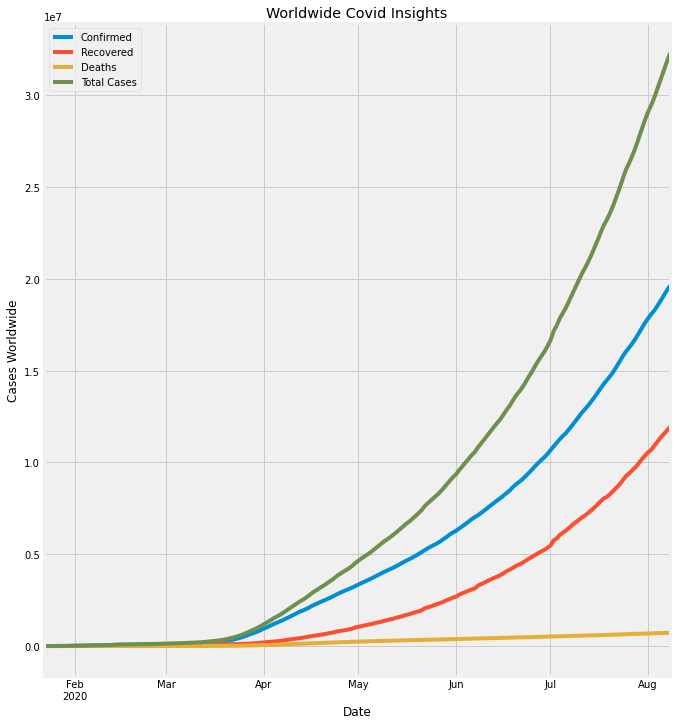

In [ ]:
w = world_df.plot(figsize=(10, 12))
w.set_xlabel('Date')
w.set_ylabel('Cases Worldwide')
w.title.set_text('Worldwide Covid Insights')
plt.show()

In [ ]:
brasil_df = df[df['Country'] == 'Brazil']
brasil_df

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
23,2020-01-22,Brazil,0,0,0,0
211,2020-01-23,Brazil,0,0,0,0
399,2020-01-24,Brazil,0,0,0,0
587,2020-01-25,Brazil,0,0,0,0
775,2020-01-26,Brazil,0,0,0,0
...,...,...,...,...,...,...
36683,2020-08-04,Brazil,2801921,2157484,95819,5055224
36871,2020-08-05,Brazil,2859073,2190361,97256,5146690
37059,2020-08-06,Brazil,2912212,2230542,98493,5241247
37247,2020-08-07,Brazil,2962442,2272299,99572,5334313


In [ ]:
brasil_df['Date'].describe()

count                     200
unique                    200
top       2020-03-13 00:00:00
freq                        1
first     2020-01-22 00:00:00
last      2020-08-08 00:00:00
Name: Date, dtype: object

In [ ]:
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 23 to 37435
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         200 non-null    datetime64[ns]
 1   Country      200 non-null    object        
 2   Confirmed    200 non-null    int64         
 3   Recovered    200 non-null    int64         
 4   Deaths       200 non-null    int64         
 5   Total Cases  200 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 10.9+ KB


In [ ]:
brasil_df.set_index('Date', inplace=True)

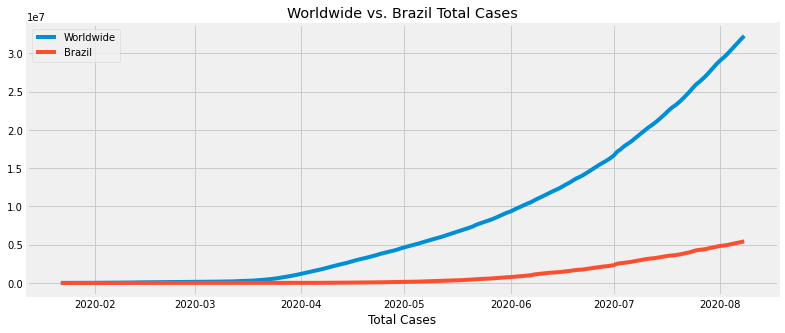

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(world_df[['Total Cases']],label='Worldwide')
ax.plot(brasil_df[['Total Cases']], label= 'Brazil')
ax.set_xlabel('Date')
ax.set_xlabel('Total Cases')
ax.title.set_text('Worldwide vs. Brazil Total Cases')

plt.legend(loc='upper left')

plt.show()



In [ ]:
brasil_df['Daily Confirmed'] = brasil_df['Confirmed'].sub(brasil_df['Confirmed'].shift())


In [ ]:
brasil_df['Daily Deaths'] = brasil_df['Deaths'].sub(brasil_df['Deaths'].shift())


In [ ]:
brasil_df.reset_index('Date', inplace=True)

In [ ]:
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   Country          200 non-null    object        
 2   Confirmed        200 non-null    int64         
 3   Recovered        200 non-null    int64         
 4   Deaths           200 non-null    int64         
 5   Total Cases      200 non-null    int64         
 6   Daily Confirmed  199 non-null    float64       
 7   Daily Deaths     199 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 12.6+ KB


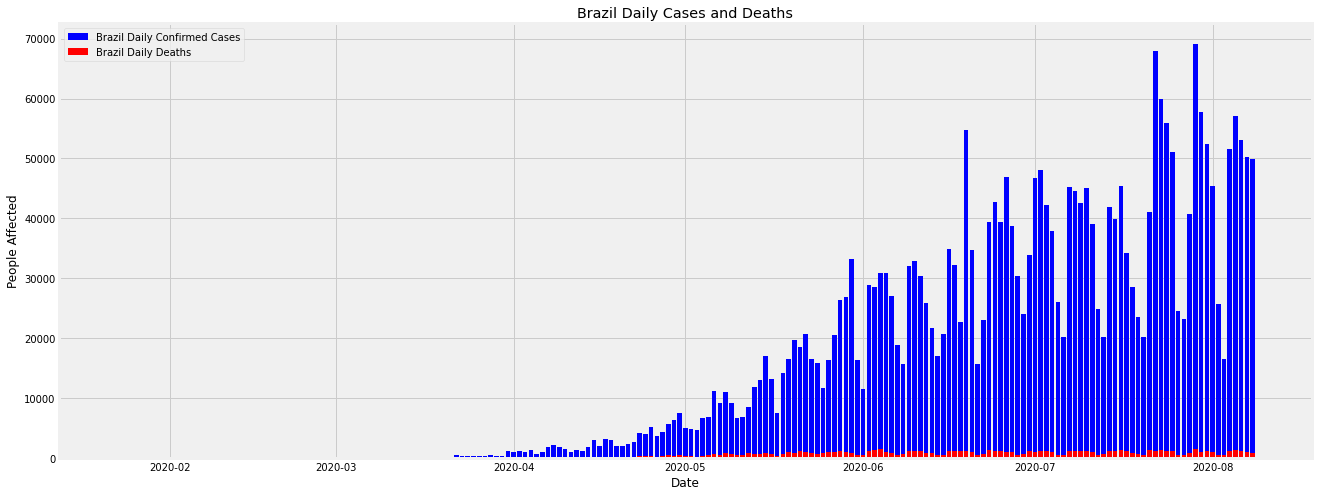

In [ ]:



fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

ax.bar(brasil_df['Date'], brasil_df['Daily Confirmed'], color='blue', label='Brazil Daily Confirmed Cases')
ax.bar(brasil_df['Date'], brasil_df['Daily Deaths'], color='red', label='Brazil Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('People Affected')
ax.title.set_text('Brazil Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

In [ ]:
# Worst Countries from last day

from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')



'2020-08-08'

In [ ]:
total_df = df[df['Date']== '2020-08-08']  #fornece a data mais recente
total_df.head(2)


,Date,Country,Confirmed,Recovered,Deaths,Total Cases
37412,2020-08-08,Afghanistan,37054,25960,1312,64326
37413,2020-08-08,Albania,6275,3268,193,9736


In [ ]:
top_10 = total_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
37586,2020-08-08,US,4997929,1643118,162423,6803470
37435,2020-08-08,Brazil,3012412,2321537,100477,5434426
37491,2020-08-08,India,2153010,1480884,43379,3677273
37552,2020-08-08,Russia,880563,688856,14827,1584246
37568,2020-08-08,South Africa,553188,404568,10210,967966
37525,2020-08-08,Mexico,475902,377125,52006,905033
37546,2020-08-08,Peru,463875,319171,20649,803695
37449,2020-08-08,Colombia,376870,204591,12540,594001
37447,2020-08-08,Chile,371023,344133,10011,725167
37493,2020-08-08,Iran,324692,282122,18264,625078


In [ ]:
#agregar com o resto do mundo
top_10.loc['rest-of-world'] = total_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
37586,2020-08-08,US,4997929,1643118,162423,6803470
37435,2020-08-08,Brazil,3012412,2321537,100477,5434426
37491,2020-08-08,India,2153010,1480884,43379,3677273
37552,2020-08-08,Russia,880563,688856,14827,1584246
37568,2020-08-08,South Africa,553188,404568,10210,967966
37525,2020-08-08,Mexico,475902,377125,52006,905033
37546,2020-08-08,Peru,463875,319171,20649,803695
37449,2020-08-08,Colombia,376870,204591,12540,594001
37447,2020-08-08,Chile,371023,344133,10011,725167
37493,2020-08-08,Iran,324692,282122,18264,625078


In [ ]:
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'
top_10

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
37586,2020-08-08,US,4997929,1643118,162423,6803470
37435,2020-08-08,Brazil,3012412,2321537,100477,5434426
37491,2020-08-08,India,2153010,1480884,43379,3677273
37552,2020-08-08,Russia,880563,688856,14827,1584246
37568,2020-08-08,South Africa,553188,404568,10210,967966
37525,2020-08-08,Mexico,475902,377125,52006,905033
37546,2020-08-08,Peru,463875,319171,20649,803695
37449,2020-08-08,Colombia,376870,204591,12540,594001
37447,2020-08-08,Chile,371023,344133,10011,725167
37493,2020-08-08,Iran,324692,282122,18264,625078


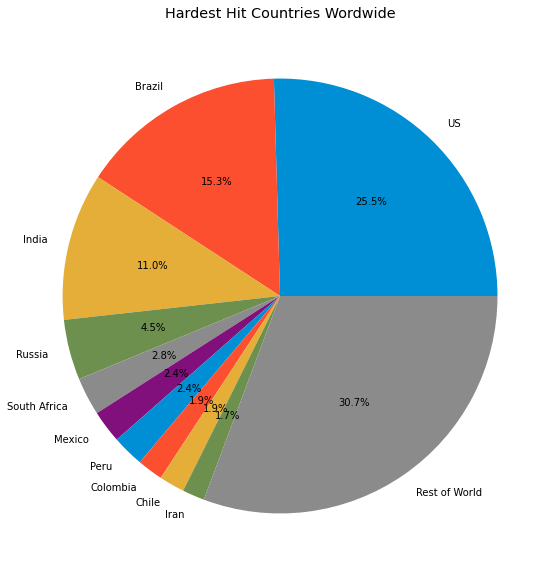

In [ ]:
fig =plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Wordwide')